In [2]:
!pip install nestle corner emcee

  Using cached https://files.pythonhosted.org/packages/8d/33/3744cd3216a49e6d89752b4fd0007ed268c19d5516bf4ba7b5c90fad040f/nestle-0.2.0.tar.gz
  Stored in directory: /Users/jpierel/Library/Caches/pip/wheels/8d/6b/8a/617f2fd643e9003bc64fb4d3be6d59b8fd391c8b0dab23eb61
Successfully built nestle


# Imports

In [1]:
import warnings
import numpy
import scipy
import scipy.stats
import astropy 
import astropy.io
import astropy.io.ascii
import matplotlib.pyplot as plt
import Library_GraphTwoDimensionDensityColorMap
warnings.simplefilter('ignore')

# Read in the data:

In [2]:
data = astropy.io.ascii.read( "RandomVariable_Generated_Data.astropydat" )
print ( data )

         A                   B           C 
------------------- ------------------- ---
   2.34805892031837  2.7833044104717874 0.0
-2.5367703345204946  -3.223129500167275 0.0
0.07704929376485503   -6.53968302126885 0.0
 1.5609166237924597  4.0781308481517025 0.0
 1.3052908596160373   7.576748569392135 0.0
 1.1193454431794485   4.225939751821434 0.0
 1.3871657592678626 0.21699058961656836 0.0
 3.5879197155248357   2.856459401189608 0.0
 2.2391260230266217   4.076909882093242 0.0
-0.5508589930363759 -3.4768902550146032 0.0
                ...                 ... ...
  7.328855453080676  5.7784354587730125 1.0
  6.270926305535283   8.285009841419276 1.0
   3.43656495159575   5.534786245696807 1.0
  6.001630063542476   2.515748619124201 1.0
   6.73771228201486   9.145617331955476 1.0
  7.797023632639812  12.522945604906258 1.0
  4.928325307181959   5.326715868428739 1.0
  8.223696982347143  12.814809276759945 1.0
 -0.718454312092919   5.249247606033224 1.0
  4.549855220976612  10.00192182

# Some useful helper functions:

In [3]:
def plot_1D_function( 
    Functions = None,
    minp = None,
    maxp = None,
    nump = None,
    Labels = None,
    ):
    
       
    if None in [Functions, minp, maxp, nump]: 
        raise Exception("arg missing..." + str([Function, minp, maxp, nump]))
    
    if Labels is None:
        Labels = [None]*len(Functions)
    
    for Label,Function in zip(Labels,Functions):

        TrialPoints = numpy.linspace(-20, 20, 100)
        Values = []
        for TrailPoint in TrialPoints:
            Values.append(Function ( TrailPoint) )

        plt.plot(TrialPoints, Values,label=Label)
        if Label is not None:
            plt.legend()
    
    
    
    return

# Marginal Distributions:

### Make a histogram of the data from column A

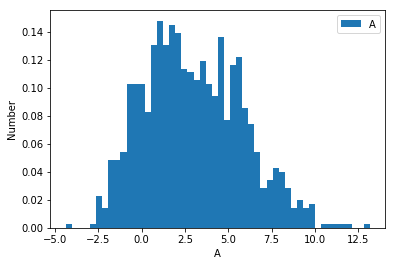

In [4]:
Adata = data['A']
plt.hist(Adata, density=True,bins=50,label='A')
plt.xlabel('A')
plt.ylabel('Number')
plt.legend()
plt.show()

### Make a histogram of the data from column B

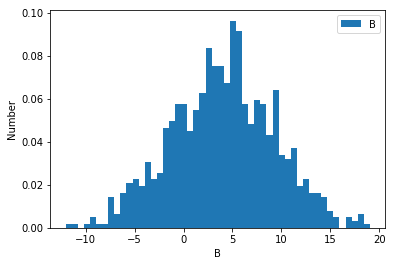

In [5]:
Bdata = data['B']
plt.hist(Bdata, density=True,bins=50,label='B')
plt.xlabel('B')
plt.ylabel('Number')
plt.legend()
plt.show()

### Approximate the data from column A as a univariate gaussian: (MARGINAL)

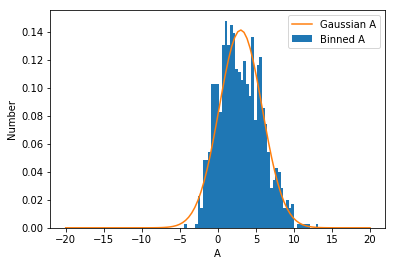

In [6]:
A_standard_deviation = numpy.sqrt( numpy.var( Adata ) )
A_mean = numpy.mean(Adata)

ATrialPoints = numpy.linspace(-20, 20, 100)
AValuePoints = scipy.stats.norm.pdf(ATrialPoints, loc = A_mean, scale = A_standard_deviation )

plt.hist(Adata, density=True, bins=50,label='Binned A')
plt.plot(ATrialPoints, AValuePoints,label='Gaussian A')
plt.xlabel('A')
plt.ylabel('Number')
plt.legend()
plt.show()

### Approximate the data from column B as a univariate gaussian: (MARGINAL)

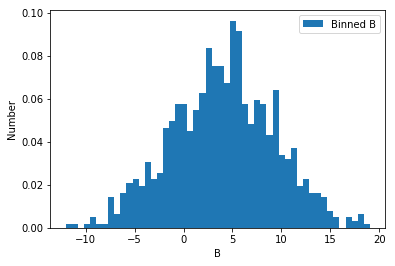

In [9]:
# STUDENTS WILL WORK ON THIS CELL

BTrialPoints = numpy.linspace(-20, 20, 100)

# Find the Gaussian values of each of the BTrialPoints 
#BValuePoints = 

plt.hist(Bdata, density=True, bins=50,label='Binned B')
#plt.plot(BTrialPoints, BValuePoints,label='Gaussian B')
plt.xlabel('B')
plt.ylabel('Number')
plt.legend()
plt.show()

# Conditional distributions

### (1) Approximate the joint probability density function of A and B with a multivariate gaussian


[[ 2.34805892  2.78330441]
 [-2.53677033 -3.2231295 ]
 [ 0.07704929 -6.53968302]
 ...
 [-0.71845431  5.24924761]
 [ 4.54985522 10.00192182]
 [ 2.01951902  2.63079009]]
[2.99955955 4.04468073]
[[ 7.99350891 10.64174365]
 [10.64174365 27.5921548 ]]
0.008750587705242681
DomainMinimumPoint [ -5 -10]
DomainMaximumPoint [10 15]
PlugInPointsCount 10000
PointsToPlugInDataset.shape (10000, 2)
PointsToPlugInDataset[0] [ -5. -10.]
MaxObservedValue 0.015361056921961772
MinObservedValue 1.0601610495048593e-12
Z.shape (100, 100)


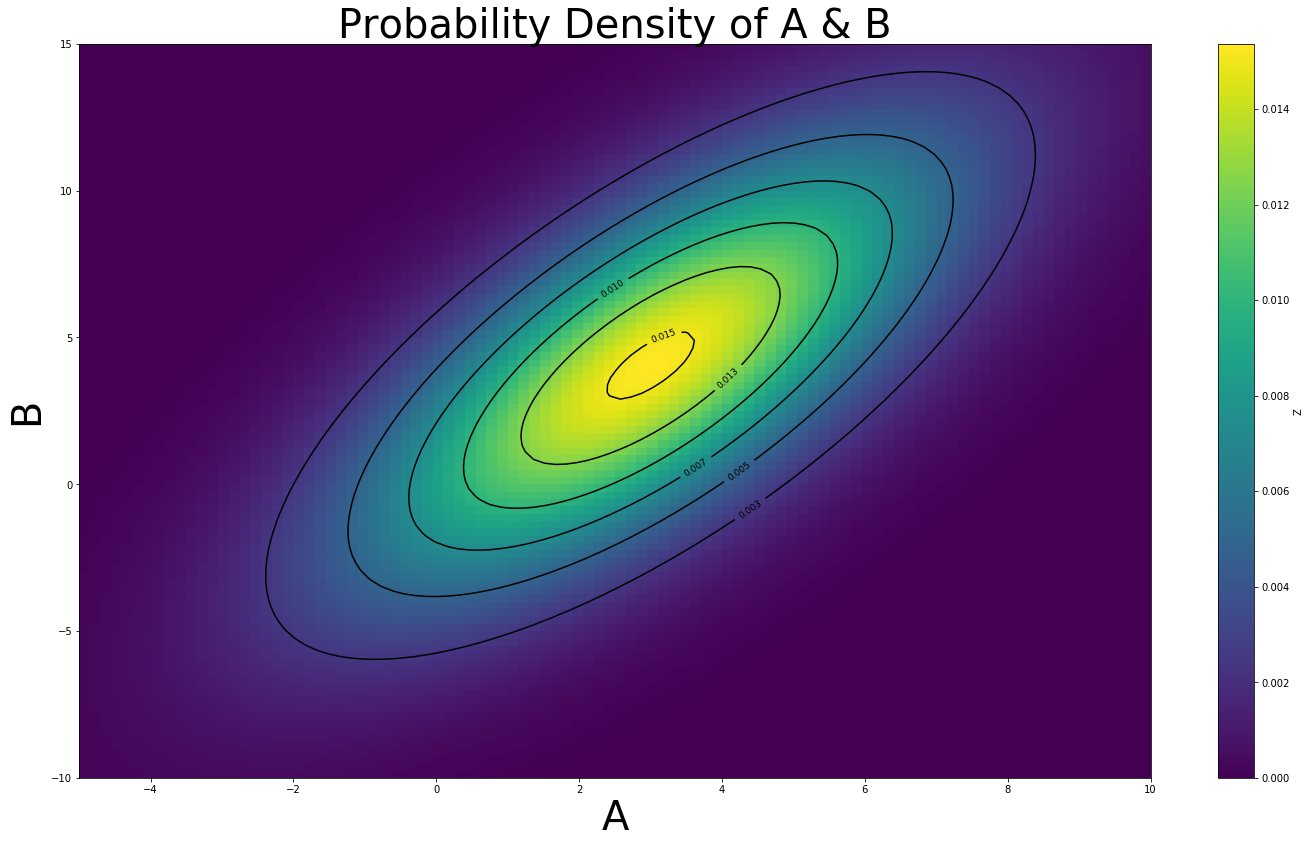

In [10]:

ABdata = numpy.vstack( ( data['A'], data['B'] ) ).T
print(ABdata)

ABMean = numpy.mean( ABdata, axis = 0 )
print (ABMean)

ABCovarianceMatrix = numpy.cov( ABdata, rowvar = False )
print (ABCovarianceMatrix)

def jointGaussian(ABpoint):
    return scipy.stats.multivariate_normal.pdf( ABpoint, ABMean, ABCovarianceMatrix )
print ( jointGaussian( [0,0]) )

Library_GraphTwoDimensionDensityColorMap.Main(
    Function = jointGaussian,
    DomainMinimumPoint  = numpy.array([-5, -10]),
    DomainMaximumPoint  = numpy.array([10, 15]),
    ShowContours = True,
    PrintExtra = False,
    #PlotThreeDimensional = True
    )
plt.title("Probability Density of A & B", fontsize=40)
plt.ylabel('B',fontsize=40)
plt.xlabel('A',fontsize=40)
plt.draw()

### (1)  Fixing A = 0, plot the unnormalized conditional probability density of B:
P(B|A)
=====


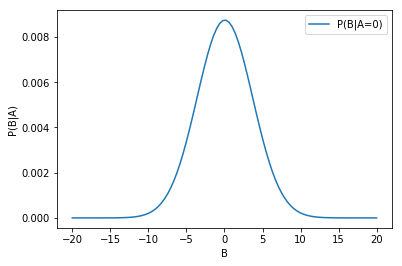

In [11]:
def BdensityConditionalOnA0_unnormalized(Bpoint):
    return jointGaussian( [0, Bpoint] )


plot_1D_function( 
    Functions = [BdensityConditionalOnA0_unnormalized],
    minp = -20,
    maxp = 20,
    nump = 100,
    Labels = ['P(B|A=0)']
    )
plt.ylabel('P(B|A)')
plt.xlabel('B')
plt.legend()
plt.show()

### (1) Fixing A = 0, plot the normalized probability density function of B:


In [12]:
FullIntegrationResult = scipy.integrate.quad( 
    BdensityConditionalOnA0_unnormalized, 
    -100, 
    100, 
    full_output = False
    )[0]
print (FullIntegrationResult )

def BdensityConditionalOnA0_normalized(Bpoint):
    return BdensityConditionalOnA0_unnormalized(Bpoint) / FullIntegrationResult



0.08037557606921114


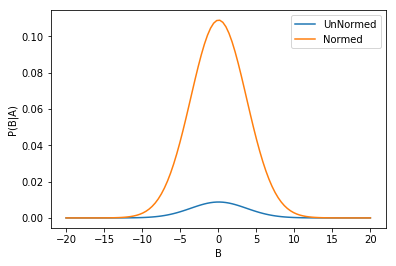

In [14]:
plot_1D_function( 
    Functions = [BdensityConditionalOnA0_unnormalized, BdensityConditionalOnA0_normalized],
    minp = -20,
    maxp = 20,
    nump = 100,
    Labels = ['UnNormed','Normed']
    )
plt.ylabel('P(B|A)')
plt.xlabel('B')
plt.legend()
plt.show()


### (1) Fixing A = 7, plot the probability density of B:


No handles with labels found to put in legend.


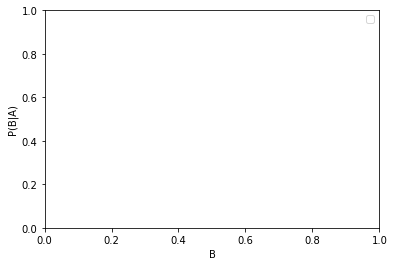

In [19]:
# STUDENTS WILL WORK ON THIS CELL

A_fixed_values=[1,3,5]

# Fill in functions to calculate B probabilities given A values in A_fixed_values here

function_list=[]

# function_list[0](3) should be the probability of B=3 given A=1

plot_1D_function( 
    Functions = function_list,
    minp = -20,
    maxp = 20,
    nump = 100,
    Labels = ['P(B|A=%i)'%i for i in A_fixed_values]
    )
plt.ylabel('P(B|A)')
plt.xlabel('B')
plt.legend()
plt.show()


### (1) Fixing B = 0 plot the unnormalized probability density of A:


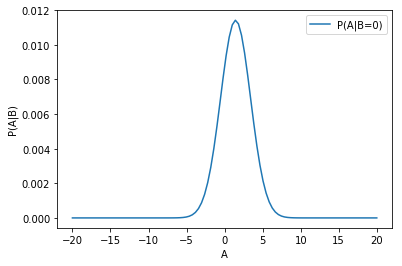

In [20]:
def AdensityConditionalOnB0_unnormalized(Apoint):
    return jointGaussian( [Apoint, 0] )


plot_1D_function( 
    Functions = [AdensityConditionalOnB0_unnormalized],
    minp = -20,
    maxp = 20,
    nump = 100,
    Labels = ['P(A|B=0)']
    )
plt.ylabel('P(A|B)')
plt.xlabel('A')
plt.legend()
plt.show()


### (1) Fixing B = 7, plot the unnormalized probability density of A:


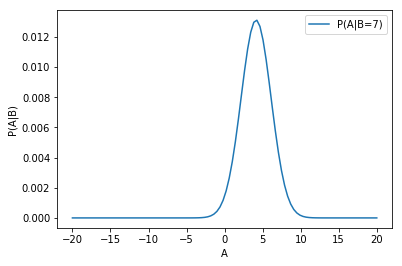

In [21]:
def AdensityConditionalOnB7_unnormalized(Apoint):
    return jointGaussian( [Apoint, 7] )


plot_1D_function( 
    Functions = [AdensityConditionalOnB7_unnormalized],
    minp = -20,
    maxp = 20,
    nump = 100,
    Labels = ['P(A|B=7)']
    )
plt.ylabel('P(A|B)')
plt.xlabel('A')
plt.legend()
plt.show()

### (2) Approximate the joint probability density function of A and B with a kernel density estimation


DomainMinimumPoint [-10 -10]
DomainMaximumPoint [20 20]
PlugInPointsCount 10000
PointsToPlugInDataset.shape (10000, 2)
PointsToPlugInDataset[0] [-10. -10.]
MaxObservedValue [0.01482457]
MinObservedValue [6.24500824e-170]
Z.shape (100, 100)


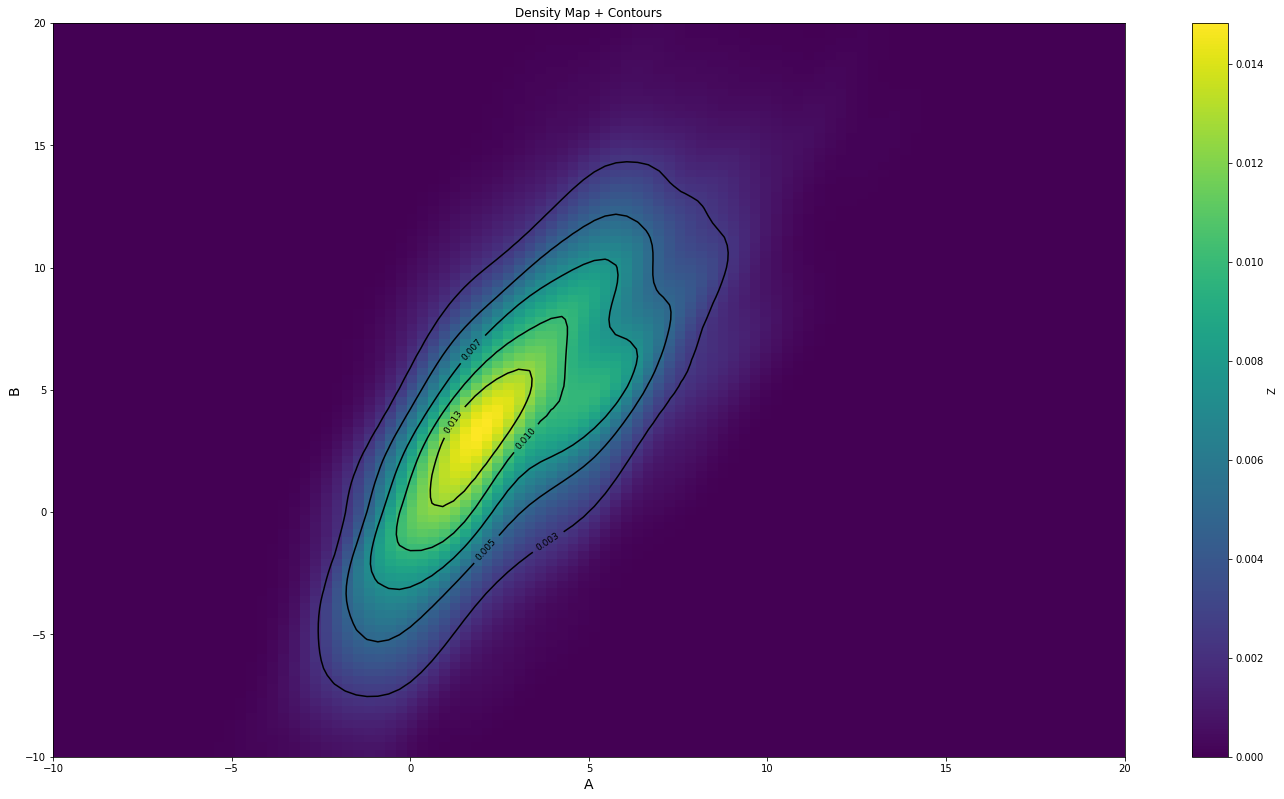

In [22]:
kernel_object = scipy.stats.gaussian_kde( ABdata.T ) #takes in points sideways...

kernel_pdf = kernel_object.pdf

Library_GraphTwoDimensionDensityColorMap.Main(
    Function = kernel_pdf,
    DomainMinimumPoint  = numpy.array([-10, -10]),
    DomainMaximumPoint  = numpy.array([20, 20]),
    ShowContours = True,
    PluginPointCount = 10000,
    PrintExtra = False,
    )
plt.ylabel("B",fontsize=14)
plt.xlabel("A",fontsize=14)
plt.show()

### (2) Approximate the conditional probability density function of B, fixing A to 5:


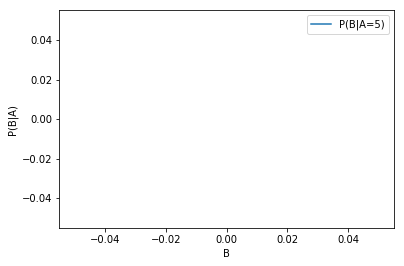

In [23]:
# STUDENTS WILL WORK ON THIS CELL
def AdensityConditionalOnB5_unnormalized_kde(Apoint):
    #Fill in function here
    return 


plot_1D_function( 
    Functions = [AdensityConditionalOnB5_unnormalized_kde],
    minp = -20,
    maxp = 20,
    nump = 100,
    Labels = ['P(B|A=5)']
    )
plt.ylabel('P(B|A)')
plt.xlabel('B')
plt.legend()
plt.show()

### (2) Approximate the conditional probability density function of A, fixing B to 5:


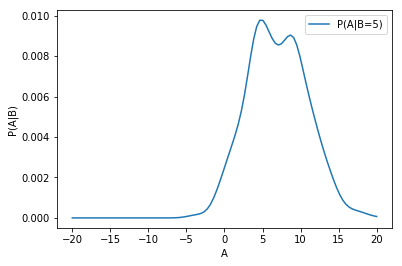

In [24]:
def AdensityConditionalOnB5_unnormalized_kde(Bpoint):
    return (kernel_object.pdf( [ 5, Bpoint]) )


plot_1D_function( 
    Functions = [AdensityConditionalOnB5_unnormalized_kde],
    minp = -20,
    maxp = 20,
    nump = 100,
    Labels = ['P(A|B=5)']
    )
plt.ylabel('P(A|B)')
plt.xlabel('A')
plt.legend()
plt.show()

## Note how the double peaked nature of the gaussian could be missed assuming gaussianity


# Final Excercise: Code up your own 1D kernel density estimation function against the data in Column A:

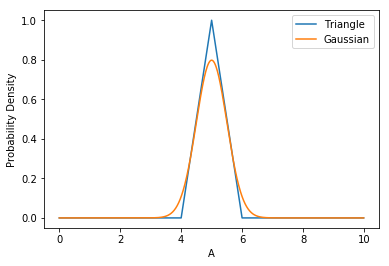

In [32]:
def Triangle_Kernel( Point, Mean, StandardDeviation):
    if Point < Mean-StandardDeviation or Point>Mean+StandardDeviation:
        return 0
    elif Point >= Mean-StandardDeviation and Point <= Mean:
        return((Point-Mean)/StandardDeviation**2+1/StandardDeviation)
    elif Point >=Mean and Point <= Mean+StandardDeviation:
        return(-(Point-Mean)/StandardDeviation**2+1/StandardDeviation)
    else: 
        print('What happened?')
    return 

plt.plot(numpy.arange(0,10,.01),[Triangle_Kernel(x,5,1) for x in numpy.arange(0,10,.01)],label='Triangle')
plt.plot(numpy.arange(0,10,.01),scipy.stats.norm.pdf( numpy.arange(0,10,.01), 5, .5 ),label="Gaussian")
plt.legend()
plt.xlabel('A')
plt.ylabel('Probability Density')
plt.show()

def GenerateKernelDensityEstimationFunction1D_Triangle( Data ):
    def KDE(  Value  ):
        Result = 0
        Bandwidth = numpy.sqrt( numpy.var(Data) ) / 6 #Bandwidth calculation
        for Datapoint in Data:
            Result += Triangle_Kernel( Value, Datapoint, Bandwidth ) #
        Probability = Result / len(Data)
        return Probability
    
    return KDE

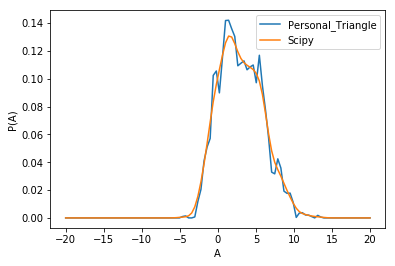

In [33]:
Personal_KDE_Function_triangle = GenerateKernelDensityEstimationFunction1D_Triangle( Adata )

scipy_KDE_Function = scipy.stats.gaussian_kde( Adata ).pdf

plot_1D_function( 
    Functions = [Personal_KDE_Function_triangle, scipy_KDE_Function],
    minp = -20,
    maxp = 20,
    nump = 100,
    Labels = ['Personal_Triangle','Scipy']
    )
plt.ylabel('P(A)')
plt.xlabel('A')
plt.legend()
plt.show()


In [28]:
# STUDENTS WILL WORK ON THIS CELL
def UnivariateGaussian( Point, Mean, StandardDeviation):
    #Fill in kernel function here
    return 


def GenerateKernelDensityEstimationFunction1D( Data ):
    
    def KDE(  Value  ):
        Result = 0
        Bandwidth = #?
        for Datapoint in Data:
            Result += UnivariateGaussian( Value, Datapoint, Bandwidth ) 
        Probability = Result / len(Data)
        return Probability
    
    return KDE
    
    
    

In [34]:
Personal_KDE_Function = GenerateKernelDensityEstimationFunction1D( Adata )

scipy_KDE_Function = scipy.stats.gaussian_kde( Adata ).pdf

plot_1D_function( 
    Functions = [Personal_KDE_Function, scipy_KDE_Function],
    minp = -20,
    maxp = 20,
    nump = 100,
    Labels = ['Personal','Scipy']
    )
plt.ylabel('P(A)')
plt.xlabel('A')
plt.legend()
plt.show()

TypeError: unsupported operand type(s) for +=: 'int' and 'NoneType'

# Discuss choice of bandwidth, delta functions, and understand the overfitting problem:

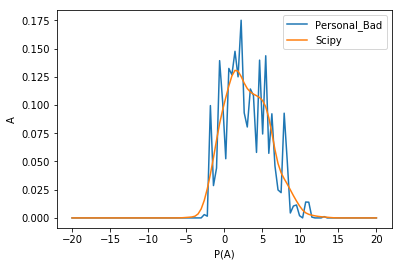

In [38]:
# STUDENTS WILL WORK ON THIS CELL
def UnivariateGaussian2( Point, Mean, StandardDeviation):
    return scipy.stats.norm.pdf( Point, Mean, StandardDeviation )

def GenerateKernelDensityEstimationFunction1D_bad( Data ):
    
    def KDE(  Value  ):
        Result = 0
        Bandwidth = numpy.sqrt( numpy.var(Data) ) / 100 #Change this Bandwidth
        for Datapoint in Data:
            Result += UnivariateGaussian2( Value, Datapoint, Bandwidth )
        Probability = Result / len(Data)
        return Probability
    
    return KDE

Personal_KDE_Function_bad = GenerateKernelDensityEstimationFunction1D_bad( Adata )

scipy_KDE_Function = scipy.stats.gaussian_kde( Adata ).pdf

plot_1D_function( 
    Functions = [Personal_KDE_Function_bad, scipy_KDE_Function],
    minp = -20,
    maxp = 20,
    nump = 100,
    Labels = ['Personal_Bad','Scipy']
    )
plt.xlabel('P(A)')
plt.ylabel('A')
plt.legend()
plt.show()
